# Star Classification Exploration and Baselining

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
stars = pd.read_csv('star_classification.csv')
stars.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [3]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [4]:
stars.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

In [5]:
#Drop 'ReRunID' because it appears to be a singular value for all entries
stars.drop('rerun_ID', axis=1, inplace=True)

In [6]:
#Remove weird outliers for spectrophotometry readings
stars = stars[stars['u'] > 0]

In [7]:
stars.describe()

obj_ID         alpha         delta             u             g  \
count  9.999900e+04  99999.000000  99999.000000  99999.000000  99999.000000   
mean   1.237665e+18    177.628653     24.135552     22.080679     20.631583   
std    8.438450e+12     96.502612     19.644608      2.251068      2.037384   
min    1.237646e+18      0.005528    -18.785328     10.996230     10.498200   
25%    1.237659e+18    127.517698      5.147477     20.352410     18.965240   
50%    1.237663e+18    180.900527     23.646462     22.179140     21.099930   
75%    1.237668e+18    233.895005     39.901582     23.687480     22.123775   
max    1.237681e+18    359.999810     83.000519     32.781390     31.602240   

                  r             i             z        run_ID       cam_col  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean      19.645777     19.084865     18.768988   4481.403354      3.511625   
std        1.854763      1.757900      1.765982   1964.739021      1.586913   
min        9.822070      9.469903      9.612333    109.000000      1.000000   
25%       18.135795     17.732280     17.460830   3187.000000      2.000000   
50%       20.125310     19.405150     19.004600   4188.000000      4.000000   
75%       21.044790     20.396510     19.921120   5326.000000      5.000000   
max       29.571860     32.141470     29.383740   8162.000000      6.000000   

           field_ID   spec_obj_ID      redshift         plate           MJD  \
count  99999.000000  9.999900e+04  99999.000000  99999.000000  99999.000000   
mean     186.127011  5.783903e+18      0.576667   5137.027890  55588.653687   
std      149.007687  3.324026e+18      0.730709   2952.312485   1808.492217   
min       11.000000  2.995191e+17     -0.009971    266.000000  51608.000000   
25%       82.000000  2.844137e+18      0.054522   2526.000000  54234.000000   
50%      146.000000  5.614896e+18      0.424176   4987.000000  55869.000000   
75%      241.000000  8.332365e+18      0.704172   7400.500000  56777.000000   
max      989.000000  1.412694e+19      7.011245  12547.000000  58932.000000   

           fiber_ID  
count  99999.000000  
mean     449.315613  
std      272.498252  
min        1.000000  
25%      221.000000  
50%      433.000000  
75%      645.000000  
max     1000.000000

In [8]:
stars['class'].value_counts().sort_index()

GALAXY    59445
QSO       18961
STAR      21593
Name: class, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Class Distribution'}, xlabel='Class', ylabel='Observations'>

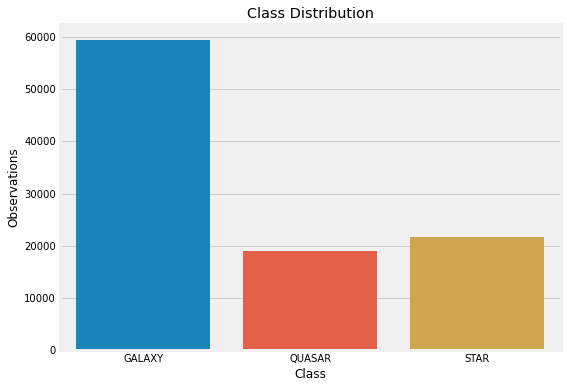

In [9]:
#Class Distribution
stars['class'].replace('QSO', 'QUASAR', inplace=True)

plt.figure(figsize=(8,6))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Observations')
sns.barplot(stars['class'].value_counts().sort_index().keys(), stars['class'].value_counts().sort_index().values)

---

## Feature Selection

In [10]:
def box_distributions(data):
    cols = list(data.columns)
    cols.remove('class')
    
    for col in cols:
        plt.figure(figsize=(9,5))
        plt.title('Feature Distribution by Class')
        sns.boxplot(x='class', y=col, data=stars)
        plt.show()
    

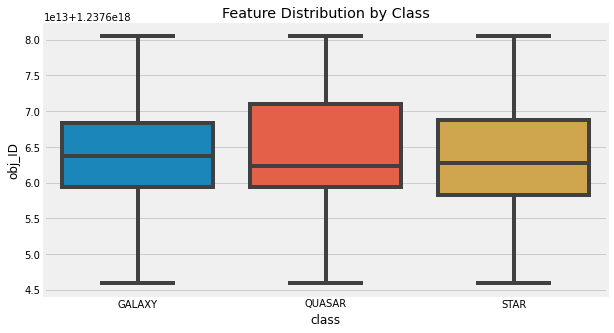

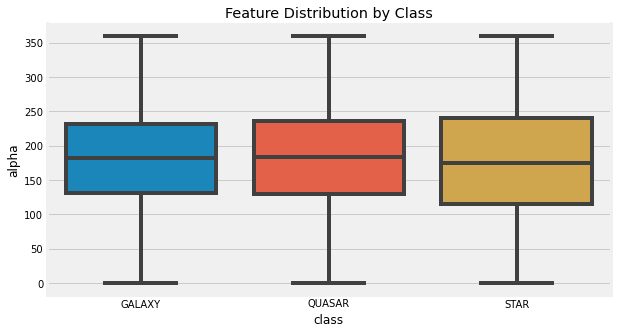

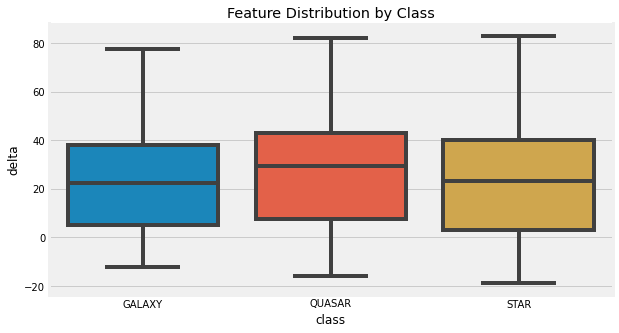

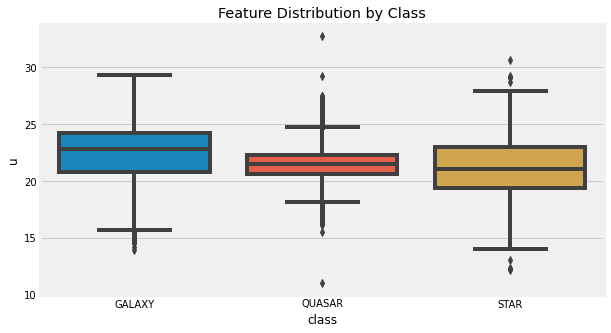

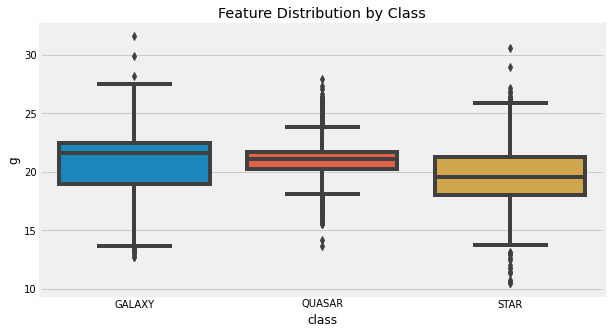

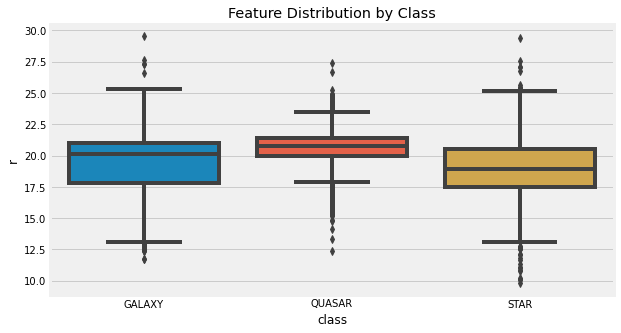

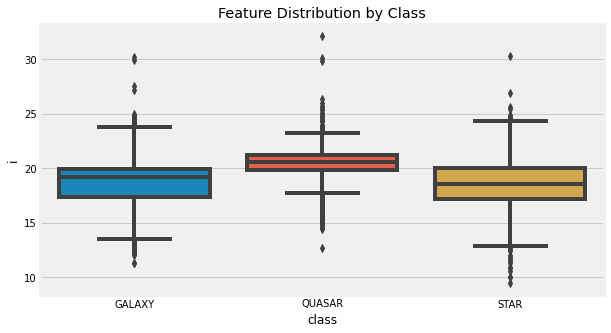

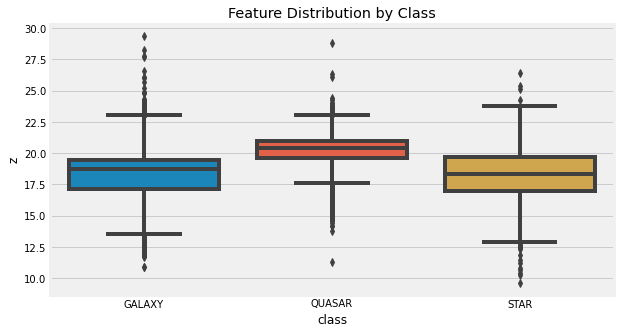

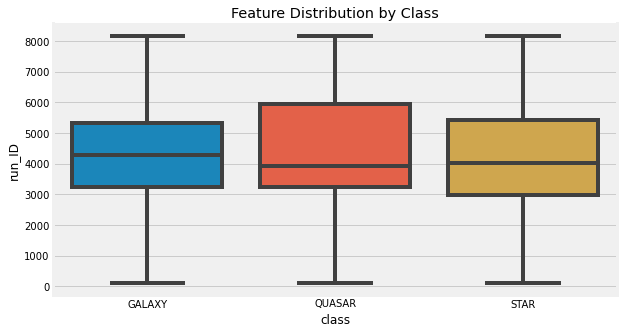

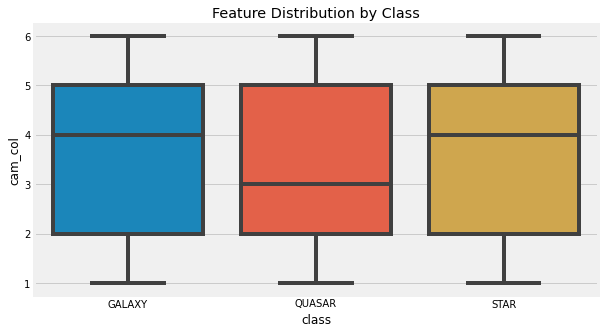

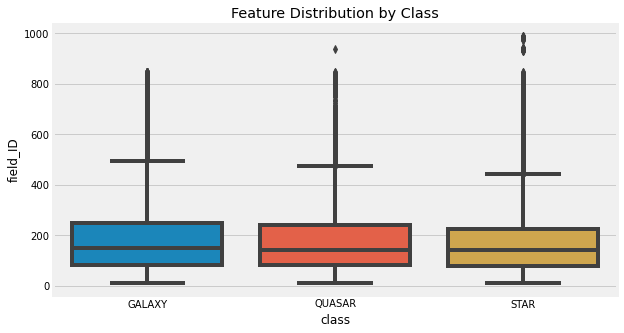

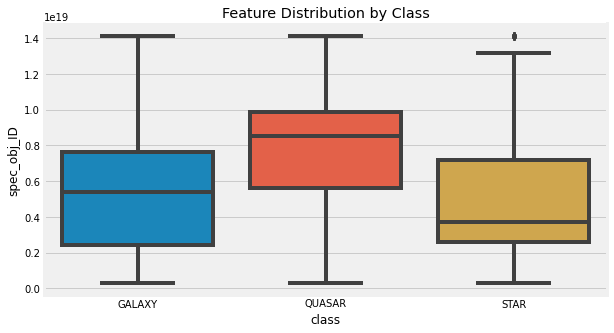

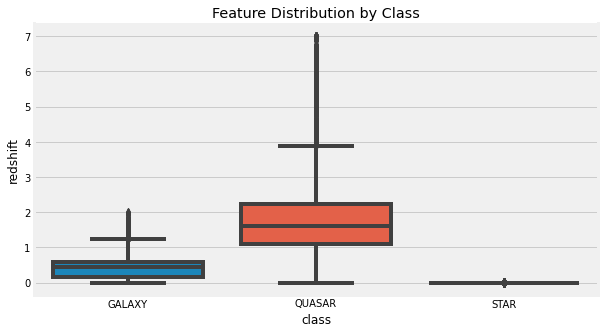

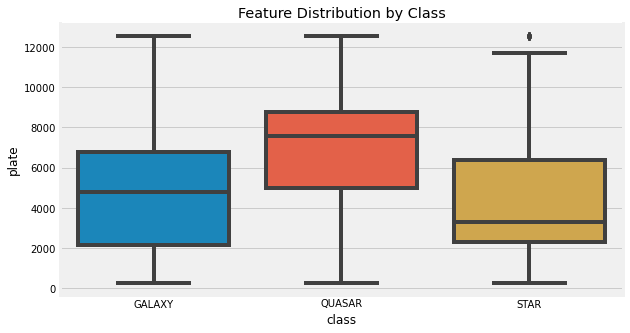

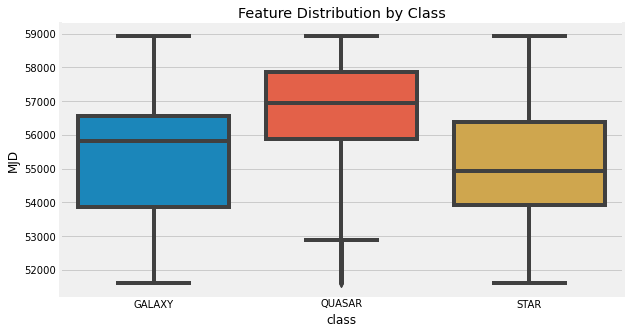

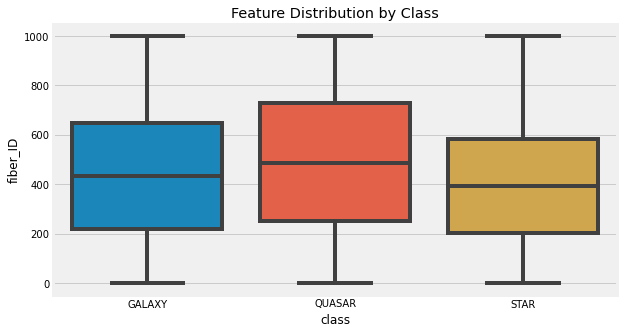

In [11]:
box_distributions(stars)

Text(0.5, 1.0, 'Feature Correlation')

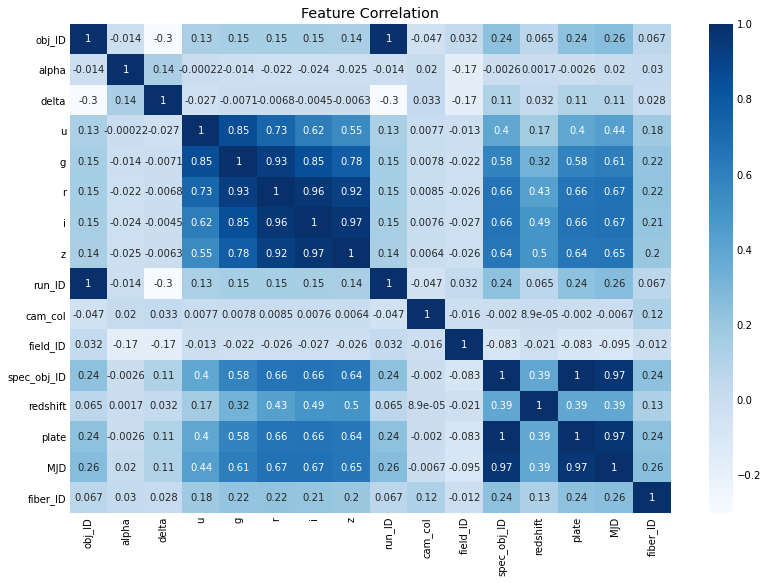

In [12]:
#Look for correlations between features
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(stars.corr(), cmap='Blues', annot=True)
ax.set_title('Feature Correlation')

In [13]:
#Drop 'run_ID', 'plate' and 'MJD' due to high correlation
stars.drop(['plate', 'MJD', 'run_ID'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'u vs g'}, xlabel='u', ylabel='g'>

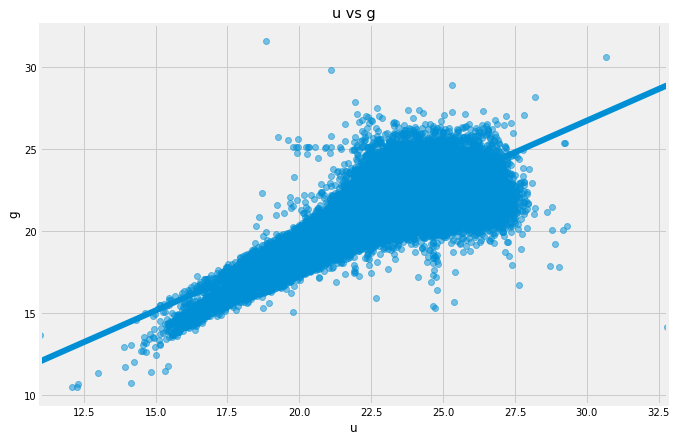

In [14]:
#Further analysis of highly correlated features
plt.figure(figsize=(10,7))
plt.title('u vs g')
sns.regplot(stars.u, stars.g, scatter_kws={'alpha':0.5})

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'i vs r'}, xlabel='i', ylabel='r'>

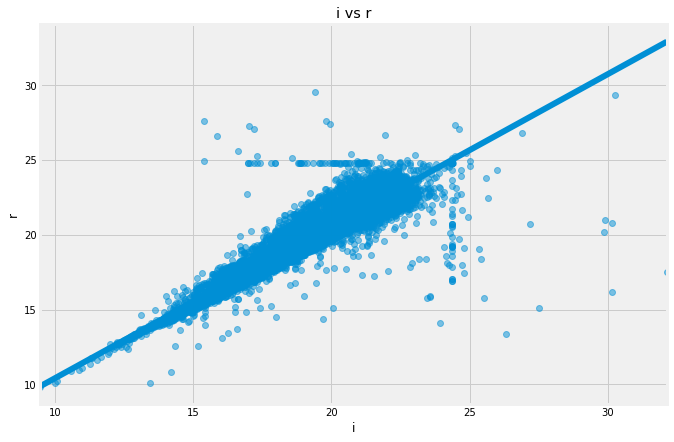

In [15]:
plt.figure(figsize=(10,7))
plt.title('i vs r')
sns.regplot(stars.i, stars.r, scatter_kws={'alpha':0.5})

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'z vs r'}, xlabel='z', ylabel='r'>

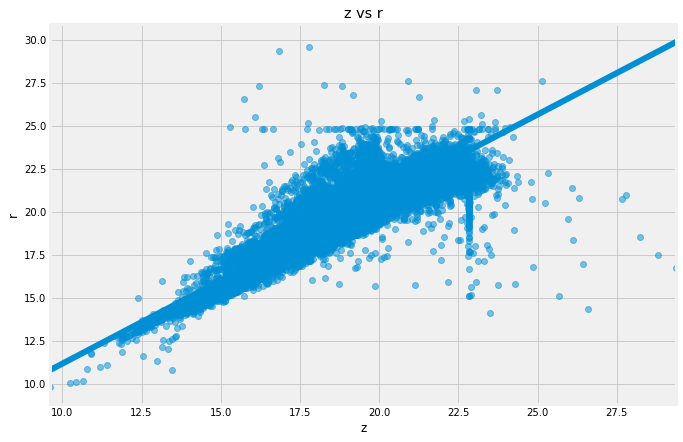

In [16]:
plt.figure(figsize=(10,7))
plt.title('z vs r')
sns.regplot(stars.z, stars.r, scatter_kws={'alpha':0.5})

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'u vs z'}, xlabel='u', ylabel='z'>

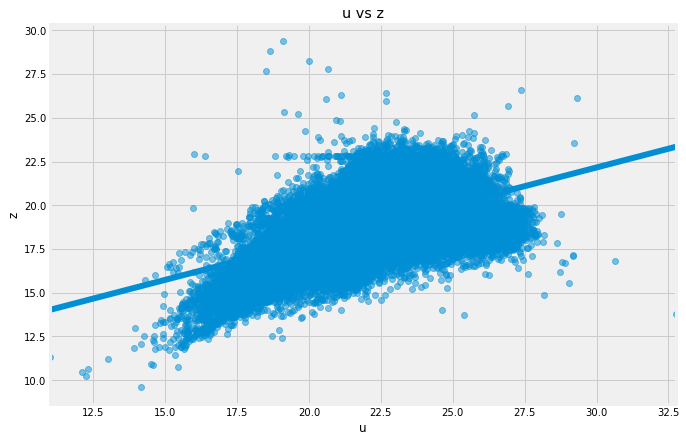

In [17]:
plt.figure(figsize=(10,7))
plt.title('u vs z')
sns.regplot(stars.u, stars.z, scatter_kws={'alpha':0.5})

In [18]:
#u ,g, r, i, and z all capture overlapping spectrum ranges of light, 
#and are highly correlated to those adjacent to each other.

#I am going to drop the middle ranges and leave only ultraviolet (u) and infrared (z)
stars.drop(['g', 'r', 'i'], axis=1, inplace=True)


Text(0.5, 1.0, 'Updated Feature Correlation')

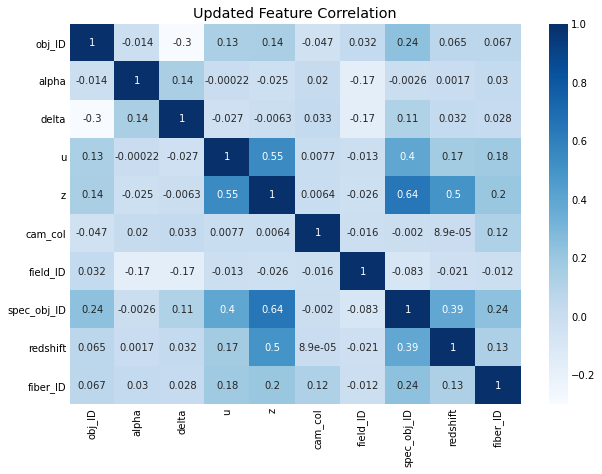

In [19]:
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(stars.corr(), cmap='Blues', annot=True)
ax.set_title('Updated Feature Correlation')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Class Distribution'}>

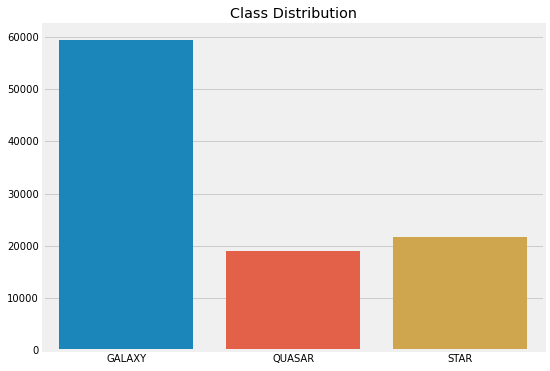

In [20]:
plt.figure(figsize=(8,6))
plt.title('Class Distribution')
sns.barplot(stars['class'].value_counts().sort_index().keys(), stars['class'].value_counts().sort_index().values)

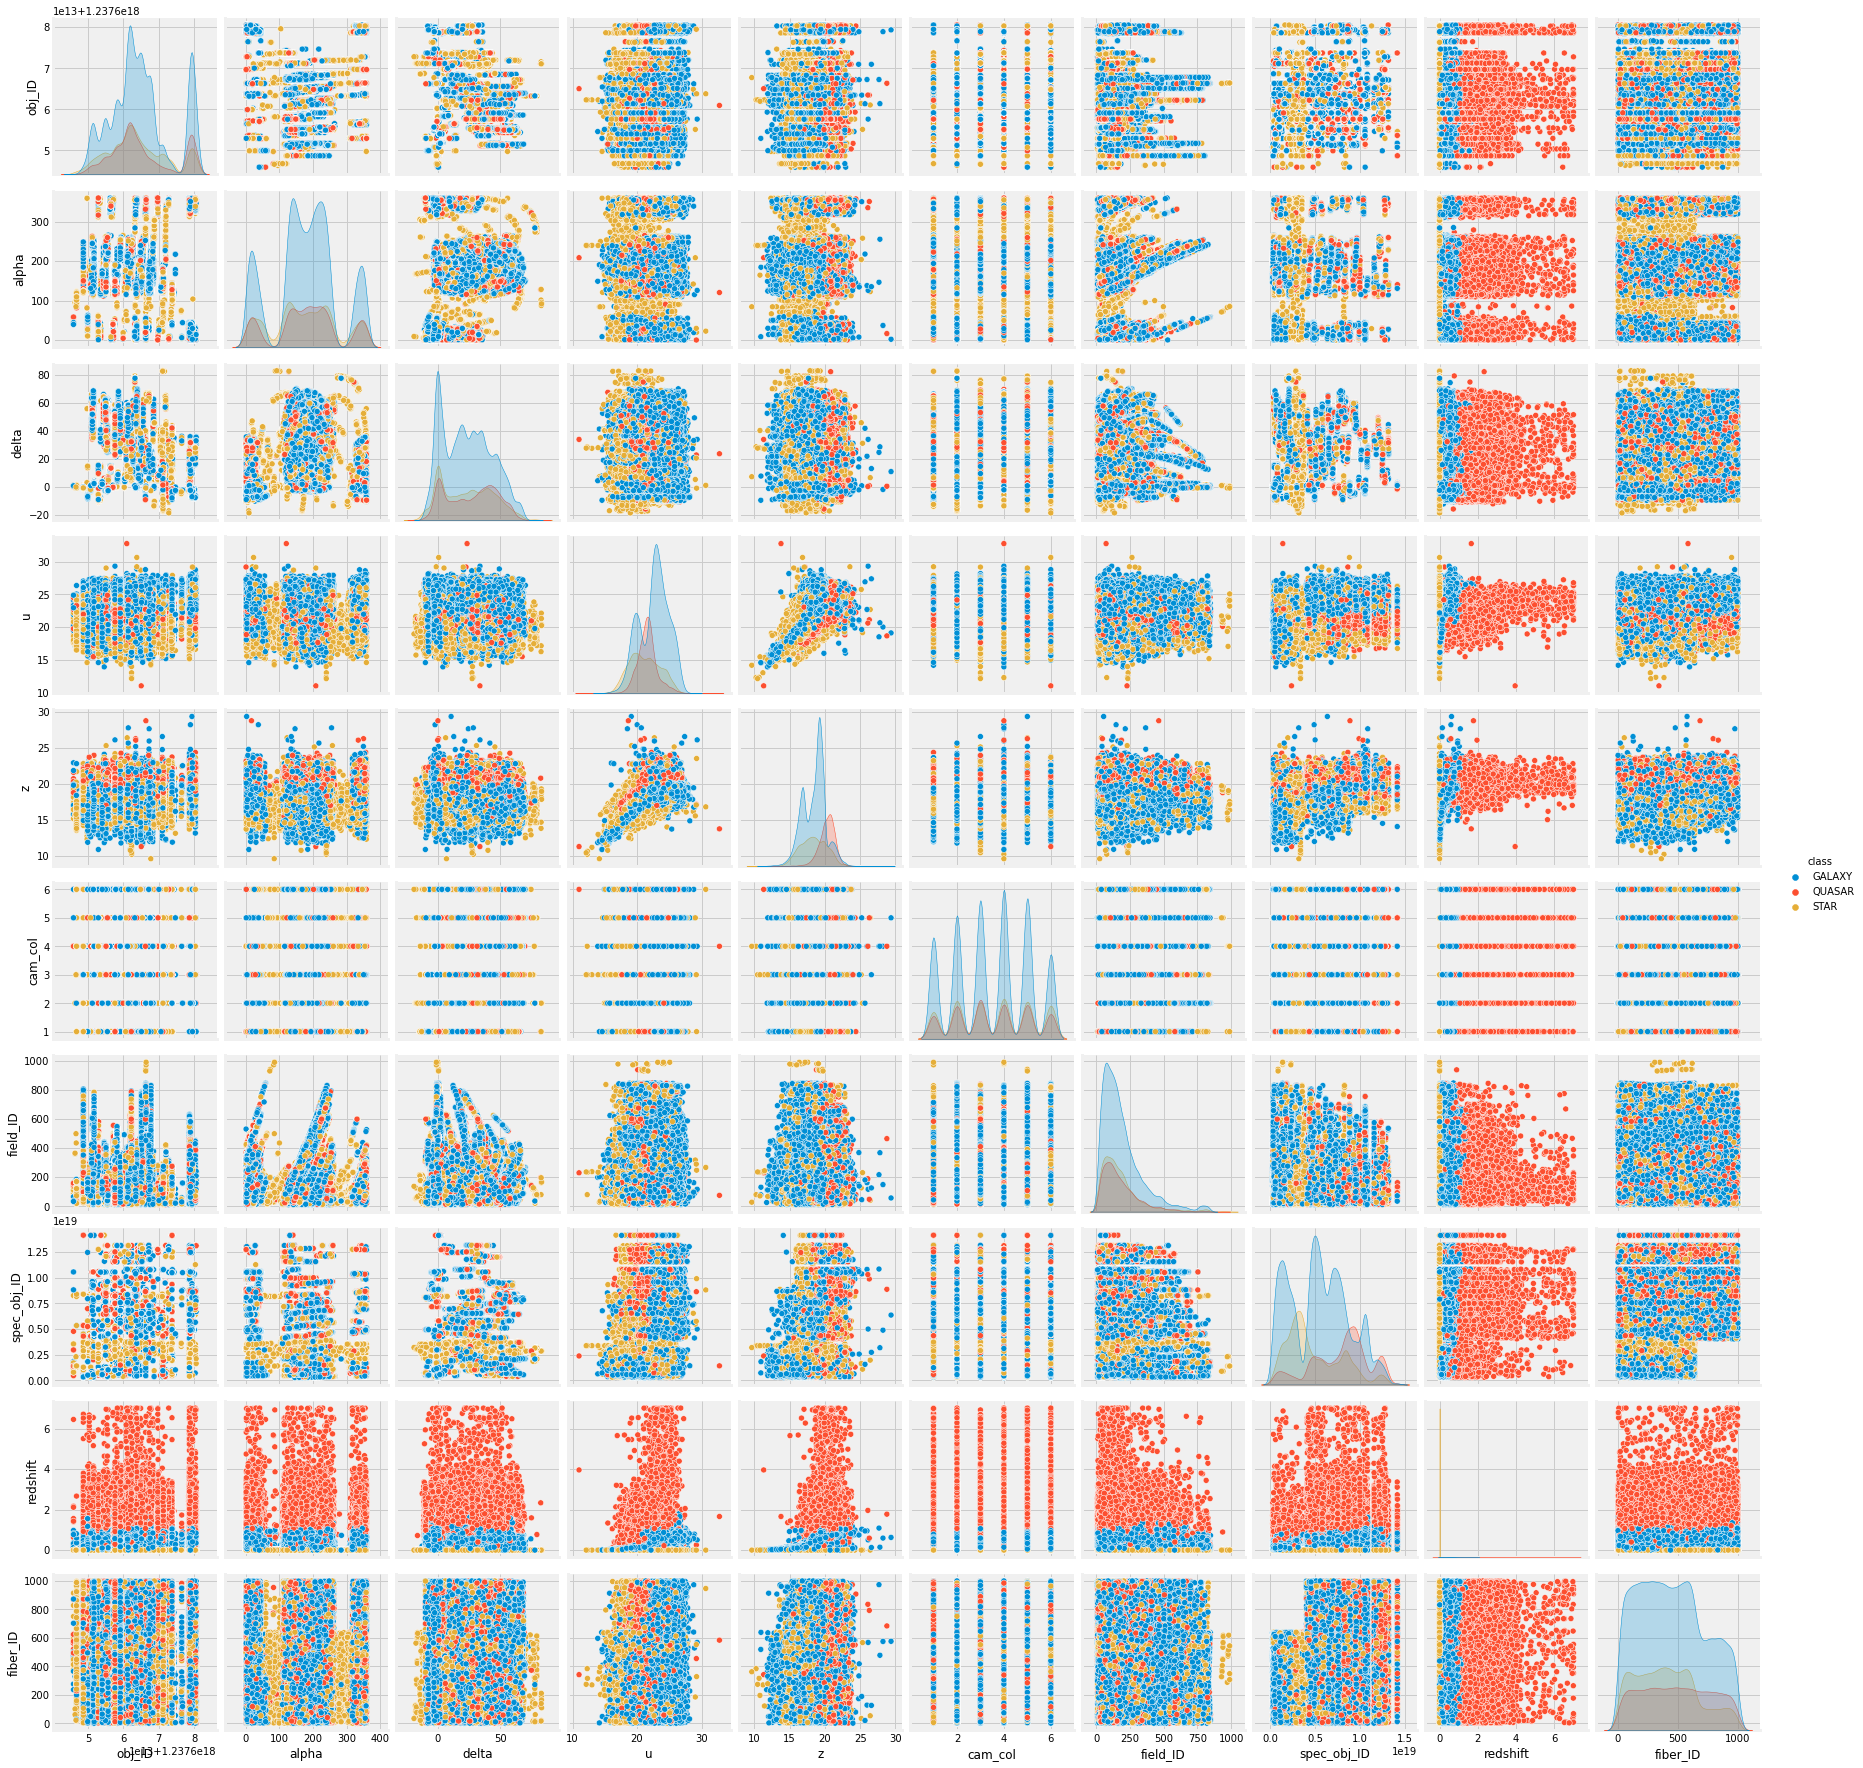

In [21]:
sns.pairplot(stars, hue='class')

In [22]:
stars.head()

obj_ID       alpha      delta         u         z  cam_col  field_ID  \
0  1.237661e+18  135.689107  32.494632  23.87882  18.79371        2        79   
1  1.237665e+18  144.826101  31.274185  24.77759  21.61427        5       119   
2  1.237661e+18  142.188790  35.582444  25.26307  18.94827        2       120   
3  1.237663e+18  338.741038  -0.402828  22.13682  19.25010        3       214   
4  1.237680e+18  345.282593  21.183866  19.43718  15.54461        3       137   

    spec_obj_ID   class  redshift  fiber_ID  
0  6.543777e+18  GALAXY  0.634794       171  
1  1.176014e+19  GALAXY  0.779136       427  
2  5.152200e+18  GALAXY  0.644195       299  
3  1.030107e+19  GALAXY  0.932346       775  
4  6.891865e+18  GALAXY  0.116123       842

## Baselining

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, confusion_matrix, classification_report, plot_confusion_matrix

In [24]:
X = stars.drop(columns=['class'], axis=1)
y = stars['class']

In [25]:
X_train_CV, X_test, y_train_CV, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=55)

X_train, X_val, y_train, y_val = train_test_split(X_train_CV, y_train_CV, 
                                                    test_size=0.25, 
                                                    random_state=55)

In [26]:
X_train_CV.shape

(79999, 10)

In [27]:
X_train.shape

(59999, 10)

In [28]:
X_val.shape

(20000, 10)

In [29]:
X_test.shape

(20000, 10)

In [30]:
#Feature Scaling and kNN Model with k=5
std = StandardScaler()

X_tr = std.fit_transform(X_train_CV)
X_te = std.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr, y_train_CV)
y_pred = knn.predict(X_te)

print(accuracy_score(y_test, y_pred))

0.9177


In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_tr, y_train_CV)

y_pred = knn.predict(X_te)

print(accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.91875
[[11605   129   342]
 [  441  3322    70]
 [  634     9  3448]]
              precision    recall  f1-score   support

      GALAXY       0.92      0.96      0.94     12076
      QUASAR       0.96      0.87      0.91      3833
        STAR       0.89      0.84      0.87      4091

    accuracy                           0.92     20000
   macro avg       0.92      0.89      0.91     20000
weighted avg       0.92      0.92      0.92     20000



In [32]:
#Logistic Regression with one-vs-rest for multiclass
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_tr, y_train_CV)

y_pred = logreg.predict(X_te)
print('Accuracy: ', logreg.score(X_te, y_test))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy:  0.9445
[[11430   326   320]
 [  417  3413     3]
 [   44     0  4047]]
              precision    recall  f1-score   support

      GALAXY       0.96      0.95      0.95     12076
      QUASAR       0.91      0.89      0.90      3833
        STAR       0.93      0.99      0.96      4091

    accuracy                           0.94     20000
   macro avg       0.93      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



In [33]:
logreg.coef_

array([[ 3.64886796e-02, -1.00597122e-03, -5.24372745e-02,
         1.49834233e+00, -1.26535035e+00, -5.49902992e-02,
         8.15710263e-02,  7.66533581e-02, -2.85330741e-01,
         3.73276815e-02],
       [ 1.17787813e-02,  1.29168220e-01,  3.00394213e-01,
        -2.36167637e+00,  1.17726815e+00,  1.09716056e-02,
         3.85309238e-03, -4.90890383e-01,  4.65763983e+00,
         4.82154363e-02],
       [-4.51300217e-02, -1.84264221e-02, -5.29273981e-02,
         4.15372046e-01,  8.29322646e-02,  6.47737601e-02,
        -8.82559498e-02,  2.76573320e-01, -5.12938338e+01,
        -6.93676824e-02]])

## Modeling and Further EDA

In [34]:
y.value_counts()

GALAXY    59445
STAR      21593
QUASAR    18961
Name: class, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution')

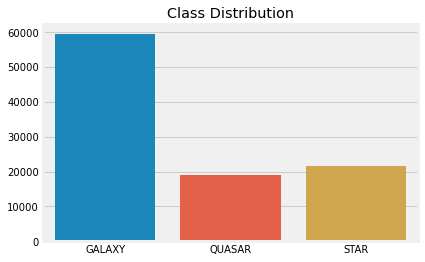

In [35]:
sns.barplot(y.value_counts().sort_index().keys(), y.value_counts().sort_index().values)
plt.title('Class Distribution')

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X,y_smote = smote.fit_resample(X,y)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Imbalance Correction via SMOTE')

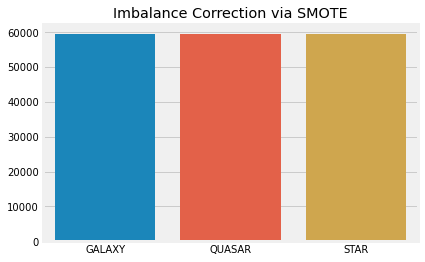

In [38]:
sns.barplot(y_smote.value_counts().sort_index().keys(), y_smote.value_counts().sort_index().values)
plt.title('Imbalance Correction via SMOTE')

In [39]:
X_train_CV, X_test, y_train_CV, y_test = train_test_split(X, y_smote, 
                                                    test_size=0.2, 
                                                    random_state=55)

X_train, X_val, y_train, y_val = train_test_split(X_train_CV, y_train_CV, 
                                                    test_size=0.25, 
                                                    random_state=55)

In [40]:
X_tr = std.fit_transform(X_train)
X_v = std.fit_transform(X_val)
X_te = std.fit_transform(X_test)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_val)

              precision    recall  f1-score   support

      GALAXY       0.96      0.95      0.95     11856
      QUASAR       0.95      0.96      0.96     11838
        STAR       1.00      1.00      1.00     11973

    accuracy                           0.97     35667
   macro avg       0.97      0.97      0.97     35667
weighted avg       0.97      0.97      0.97     35667



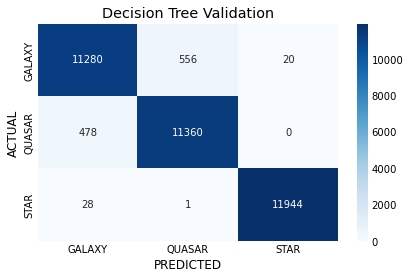

In [55]:
print(classification_report(y_val, y_pred))

sns.heatmap(confusion_matrix(y_val, y_pred), 
            cmap='Blues', 
            annot=True, 
            fmt='g', xticklabels=['GALAXY', 'QUASAR', 'STAR']
           )
plt.yticks(np.arange(3)+0.5, ('GALAXY', 'QUASAR', 'STAR'), 
              fontsize=10, 
              va='center')

plt.title('Decision Tree Validation')
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')

plt.show()

In [56]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_val)

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     11856
      QUASAR       0.98      0.97      0.97     11838
        STAR       1.00      1.00      1.00     11973

    accuracy                           0.98     35667
   macro avg       0.98      0.98      0.98     35667
weighted avg       0.98      0.98      0.98     35667



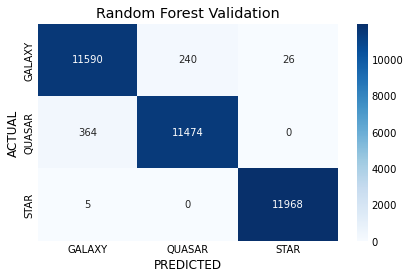

In [57]:
print(classification_report(y_val, y_pred))

sns.heatmap(confusion_matrix(y_val, y_pred), 
            cmap='Blues', 
            annot=True, 
            fmt='g', xticklabels=['GALAXY', 'QUASAR', 'STAR']
           )
plt.yticks(np.arange(3)+0.5, ('GALAXY', 'QUASAR', 'STAR'), 
              fontsize=10, 
              va='center')

plt.title('Random Forest Validation')
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')

plt.show()

In [58]:
#Selecting Random Forest as chosen model. 
#Training on combined train and validation sets, then final test on test set.
rfc = RandomForestClassifier()
rfc.fit(X_train_CV, y_train_CV)

y_pred = rfc.predict(X_test)

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     12036
      QUASAR       0.98      0.97      0.97     11775
        STAR       1.00      1.00      1.00     11856

    accuracy                           0.98     35667
   macro avg       0.98      0.98      0.98     35667
weighted avg       0.98      0.98      0.98     35667



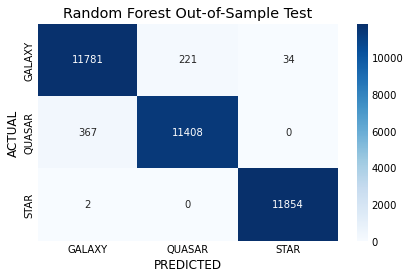

In [59]:
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), 
            cmap='Blues', 
            annot=True, 
            fmt='g', xticklabels=['GALAXY', 'QUASAR', 'STAR']
           )
plt.yticks(np.arange(3)+0.5, ('GALAXY', 'QUASAR', 'STAR'), 
              fontsize=10, 
              va='center')

plt.title('Random Forest Out-of-Sample Test')
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')

plt.show()

### More EDA

In [60]:
#Important Nodes
for name, importance in zip(X_test.columns, rfc.feature_importances_):
    print(name, "=", importance)

obj_ID = 0.0071364263531099375
alpha = 0.010489783138720466
delta = 0.010905356576496545
u = 0.07772523940164648
z = 0.12052999258292155
cam_col = 0.002870729539487885
field_ID = 0.006559615837884381
spec_obj_ID = 0.058658088437226356
redshift = 0.6972661171739468
fiber_ID = 0.007858650958559504


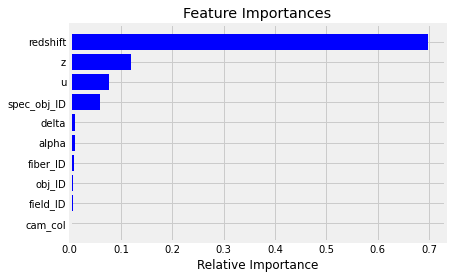

In [61]:
features = X_test.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

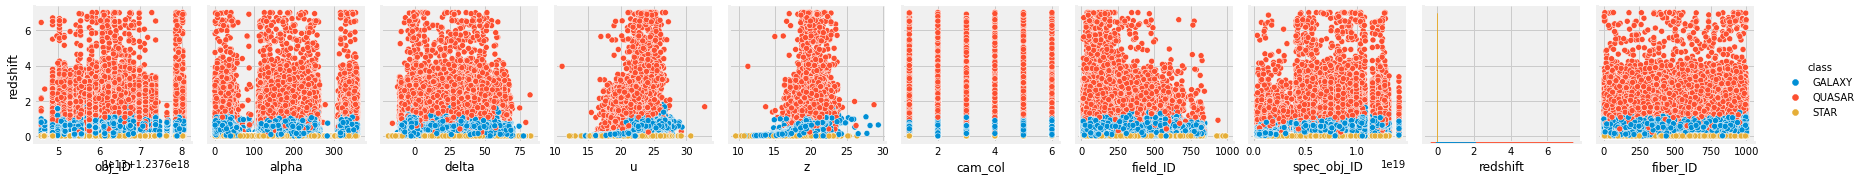

In [62]:
sns.pairplot(stars, y_vars='redshift', hue='class')

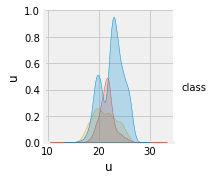

In [63]:
sns.pairplot(stars, x_vars='u', y_vars='u', hue='class')

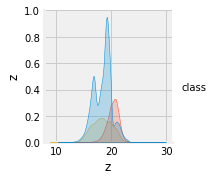

In [64]:
sns.pairplot(stars, x_vars='z', y_vars='z', hue='class')

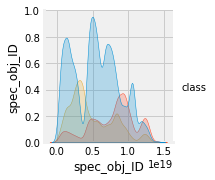

In [65]:
sns.pairplot(stars, x_vars='spec_obj_ID', y_vars='spec_obj_ID', hue='class')

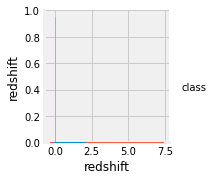

In [66]:
sns.pairplot(stars, x_vars='redshift', y_vars='redshift', hue='class')

## Removing Redshift

In [67]:
X = stars.drop(columns=['class', 'redshift'])
y = stars['class']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=55)

X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.fit_transform(X_test)

Accuracy:  0.728
              precision    recall  f1-score   support

      GALAXY       0.76      0.92      0.83     12076
      QUASAR       0.66      0.77      0.71      3833
        STAR       0.62      0.13      0.21      4091

    accuracy                           0.73     20000
   macro avg       0.68      0.60      0.58     20000
weighted avg       0.71      0.73      0.68     20000



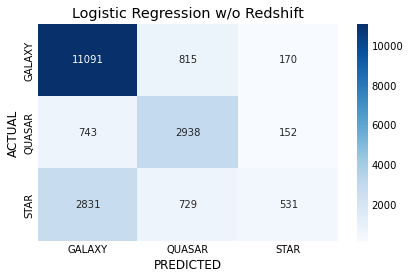

In [69]:
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print('Accuracy: ', logreg.score(X_test_scaled, y_test))

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            cmap='Blues', 
            annot=True, 
            fmt='g', xticklabels=['GALAXY', 'QUASAR', 'STAR']
           )
plt.yticks(np.arange(3)+0.5, ('GALAXY', 'QUASAR', 'STAR'), 
              fontsize=10, 
              va='center')

plt.title('Logistic Regression w/o Redshift')
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')

plt.show()

              precision    recall  f1-score   support

      GALAXY       0.90      0.94      0.92     12076
      QUASAR       0.75      0.79      0.77      3833
        STAR       0.80      0.66      0.72      4091

    accuracy                           0.85     20000
   macro avg       0.82      0.80      0.80     20000
weighted avg       0.85      0.85      0.85     20000



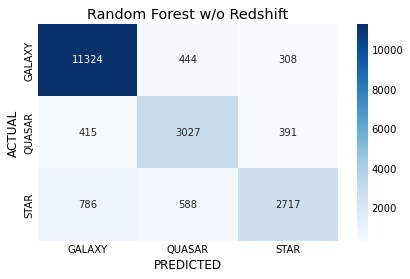

In [70]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

y_pred = rfc.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), 
            cmap='Blues', 
            annot=True, 
            fmt='g', xticklabels=['GALAXY', 'QUASAR', 'STAR']
           )
plt.yticks(np.arange(3)+0.5, ('GALAXY', 'QUASAR', 'STAR'), 
              fontsize=10, 
              va='center')

plt.title('Random Forest w/o Redshift')
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')

plt.show()